# Cargar los datos
<hr>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Descriptores_moleculares/Dataframes_descriptores/des_STAT3.csv")

# Visualizar datos
<hr>

In [3]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL503946,NaN,C[S+]([O-])CC[C@H](NC(=O)[C@@H]1Cc2cccc3c2N1C(...,IC50,'=',7600.0,nM,13.781086,13.781086,0.042028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL515762,NaN,NC(=O)C1CCN(C(=O)[C@@H]2Cc3cccc4c3N2C(=O)[C@@H...,IC50,'=',595.0,nM,13.800832,13.800832,0.021560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL196561,NaN,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...,IC50,'=',1780.0,nM,13.610338,13.610338,0.021957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,CHEMBL4164056,NaN,COC(=O)C1=CO[C@@H](O[C@@H]2O[C@H](C)[C@@H](O)[...,IC50,'=',79100.0,nM,12.886177,12.886177,0.031177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL575484,NaN,CC(C)C[C@H](CCC(N)=O)NC(=O)[C@@H]1[C@@H]2C[C@@...,IC50,'=',1630.0,nM,13.770126,13.770126,0.015577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Añadir el valor de 1000
<hr>

In [4]:
# 1 significa inhibidor
# 0 significa no inhibidor

def inhibidor(IC50):
    if IC50 > 1000:
        return 0
    else:
        return 1

In [5]:
df["Inhibidor"] = df["Standard Value"].apply(inhibidor)

In [6]:
df.to_csv("Datos_con_1000/STAT3_1000.csv", index=False)

# Escalado de datos
<hr>

In [6]:
col_names = df.columns[7:217]

In [7]:
descriptors = df[col_names]

In [8]:
descriptors.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.781086,13.781086,0.042028,-4.693935,0.132936,19.523810,618.605,587.357,618.154936,224.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.800832,13.800832,0.021560,-4.674062,0.280863,22.250000,568.523,539.291,568.172301,210.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.610338,13.610338,0.021957,-4.732044,0.119218,16.536585,597.606,557.286,597.256364,228.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,12.886177,12.886177,0.031177,-1.730830,0.129166,47.127273,792.781,740.365,792.305194,312.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.770126,13.770126,0.015577,-4.672301,0.148551,21.238095,606.657,563.313,606.281851,232.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
scaled_data = scaler.fit_transform(descriptors)

In [11]:
df_scaled = pd.DataFrame(scaled_data, columns=descriptors.columns)

In [12]:
df_scaled

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.856206,0.856206,0.042907,0.223770,0.134427,0.217762,0.218738,0.223289,0.218711,0.201474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.857670,0.857670,0.022011,0.226489,0.292897,0.274852,0.194893,0.198743,0.194899,0.184275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.843553,0.843553,0.022417,0.218556,0.119732,0.155207,0.208740,0.207933,0.208755,0.206388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0
3,0.789891,0.789891,0.031830,0.629177,0.130389,0.795808,0.301667,0.301427,0.301677,0.309582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.855394,0.855394,0.015902,0.226730,0.151155,0.253661,0.213049,0.211011,0.213055,0.211302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.800589,0.800589,0.151138,0.259625,0.285634,0.116048,0.205370,0.212554,0.205387,0.196560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
826,0.611629,0.611629,0.199931,0.799236,0.593167,0.083939,0.122518,0.119571,0.122508,0.127764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
827,0.839643,0.839643,0.066278,0.266911,0.177635,0.100378,0.243048,0.249879,0.243044,0.233415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
828,0.863887,0.863887,0.029609,0.277630,0.031404,0.118196,0.454285,0.456886,0.454189,0.439803,...,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.421053,0.0


# Filtro de baja varianza
<hr>

In [13]:
df_scaled.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.856206,0.856206,0.042907,0.223770,0.134427,0.217762,0.218738,0.223289,0.218711,0.201474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.857670,0.857670,0.022011,0.226489,0.292897,0.274852,0.194893,0.198743,0.194899,0.184275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.843553,0.843553,0.022417,0.218556,0.119732,0.155207,0.208740,0.207933,0.208755,0.206388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0
3,0.789891,0.789891,0.031830,0.629177,0.130389,0.795808,0.301667,0.301427,0.301677,0.309582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.855394,0.855394,0.015902,0.226730,0.151155,0.253661,0.213049,0.211011,0.213055,0.211302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [14]:
threshold = 0.01

In [15]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=threshold)

In [16]:
selector.fit(df_scaled)

VarianceThreshold(threshold=0.01)

In [17]:
des_var= df_scaled.loc[:, selector.get_support()]

In [18]:
des_var

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,...,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_thiazole,fr_thiophene
0,0.856206,0.856206,0.042907,0.223770,0.134427,0.217762,0.904764,0.492063,0.502793,1.000000,...,1.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0
1,0.857670,0.857670,0.022011,0.226489,0.292897,0.274852,0.904764,0.764487,0.383167,0.738465,...,1.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0
2,0.843553,0.843553,0.022417,0.218556,0.119732,0.155207,0.904764,0.764486,0.383167,0.738465,...,1.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0
3,0.789891,0.789891,0.031830,0.629177,0.130389,0.795808,0.534853,0.678273,0.314637,0.591153,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.855394,0.855394,0.015902,0.226730,0.151155,0.253661,0.904764,0.764487,0.383167,0.738465,...,1.0,0.5,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.800589,0.800589,0.151138,0.259625,0.285634,0.116048,0.703234,0.661993,0.331086,0.777257,...,0.0,0.0,1.0,0.000000,0.5,0.0,0.0,0.0,0.0,0.0
826,0.611629,0.611629,0.199931,0.799236,0.593167,0.083939,0.188208,0.650780,0.342417,0.208019,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
827,0.839643,0.839643,0.066278,0.266911,0.177635,0.100378,0.703234,0.661993,0.331086,0.777257,...,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
828,0.863887,0.863887,0.029609,0.277630,0.031404,0.118196,0.517940,0.650012,0.343193,0.572459,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.5,0.0,0.5,0.0


In [19]:
des_var.to_csv("Baja_varianza/STAT3_var.csv", index=False)

# Determinación de correlación
<hr>

In [20]:
correlation_spearman = des_var.corr(method='spearman')

In [21]:
correlation_spearman

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,...,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_thiazole,fr_thiophene
MaxAbsEStateIndex,1.000000,1.000000,-0.407777,-0.804908,-0.765515,0.334361,0.528760,-0.150311,0.427290,0.531704,...,0.356340,0.041142,0.028528,0.381000,-0.044011,-0.242699,0.493620,0.006290,-0.135623,-0.176775
MaxEStateIndex,1.000000,1.000000,-0.407777,-0.804908,-0.765515,0.334361,0.528760,-0.150311,0.427290,0.531704,...,0.356340,0.041142,0.028528,0.381000,-0.044011,-0.242699,0.493620,0.006290,-0.135623,-0.176775
MinAbsEStateIndex,-0.407777,-0.407777,1.000000,0.386424,0.395686,-0.217009,-0.391900,0.111895,-0.424410,-0.357909,...,-0.367327,-0.111318,-0.034270,-0.329261,0.046706,0.152639,-0.113890,0.037888,0.051907,0.097480
MinEStateIndex,-0.804908,-0.804908,0.386424,1.000000,0.707931,-0.362033,-0.715330,0.061101,-0.497843,-0.693692,...,-0.496214,-0.006679,-0.086838,-0.460234,0.009864,0.363449,-0.403857,-0.149979,0.210696,0.243565
qed,-0.765515,-0.765515,0.395686,0.707931,1.000000,-0.382316,-0.565221,0.114306,-0.513102,-0.553178,...,-0.508376,-0.074845,-0.013546,-0.520983,0.127520,0.082257,-0.192130,0.071972,0.068170,0.209402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_sulfide,-0.242699,-0.242699,0.152639,0.363449,0.082257,-0.125654,-0.286896,0.035730,-0.155802,-0.277550,...,-0.135153,-0.088785,-0.073796,-0.107265,-0.058311,1.000000,-0.150608,-0.046733,0.298783,-0.051284
fr_sulfonamd,0.493620,0.493620,-0.113890,-0.403857,-0.192130,-0.026619,-0.040587,-0.291109,0.035723,0.000799,...,-0.246185,-0.087915,-0.144590,-0.218586,0.028619,-0.150608,1.000000,-0.071658,-0.086238,-0.094294
fr_sulfone,0.006290,0.006290,0.037888,-0.149979,0.071972,-0.043721,0.104770,0.030835,-0.031226,0.094726,...,-0.025559,-0.037343,-0.018914,-0.020875,0.016300,-0.046733,-0.071658,1.000000,-0.041543,-0.029852
fr_thiazole,-0.135623,-0.135623,0.051907,0.210696,0.068170,-0.217272,-0.110220,-0.024560,-0.061753,-0.123909,...,-0.080479,-0.042409,-0.042766,-0.135173,-0.072501,0.298783,-0.086238,-0.041543,1.000000,0.045201


In [22]:
correlation_spearman_abs = correlation_spearman.abs()

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


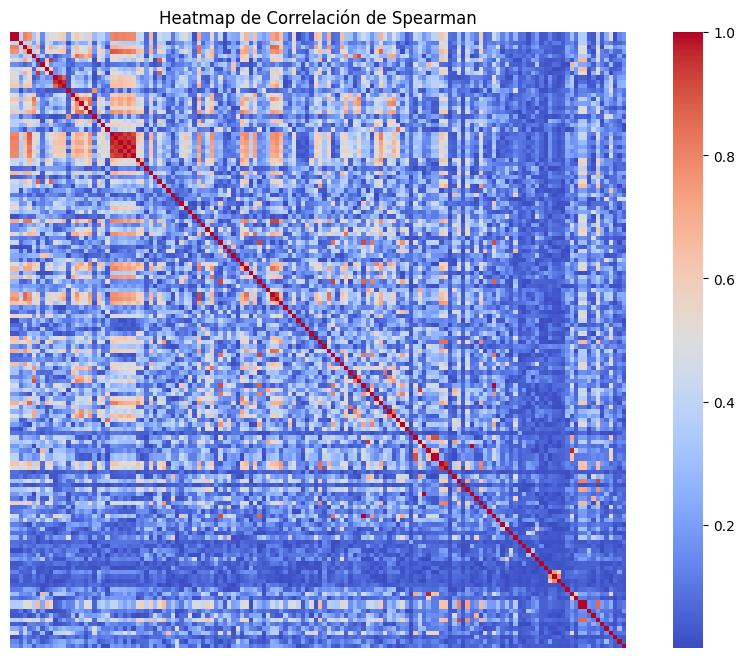

In [24]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el heatmap
sns.heatmap(correlation_spearman_abs, cmap='coolwarm', fmt='.2f', square=True, xticklabels=False, yticklabels=False)

# Configurar los títulos y etiquetas
plt.title('Heatmap de Correlación de Spearman')
plt.show()


In [25]:
import random

to_keep = []

for col in correlation_spearman.columns:
    for idx in range(len(correlation_spearman)):
        # Usa .iloc para acceder a los elementos por posición
        if abs(correlation_spearman.iloc[idx][col]) > 0.85 and col != correlation_spearman.index[idx]:
            # Solo agregar si la variable no está ya en la lista para evitar duplicados
            if col not in to_keep and correlation_spearman.index[idx] not in to_keep:
                # Elegir aleatoriamente una variable del par
                selected_variable = random.choice([col, correlation_spearman.index[idx]])
                if selected_variable not in to_keep:
                    to_keep.append(selected_variable)

# Ahora 'to_keep' contendrá las variables seleccionadas
print("Variables seleccionadas:", to_keep)


Variables seleccionadas: ['MaxEStateIndex', 'EState_VSA1', 'qed', 'SPS', 'MinAbsPartialCharge', 'MaxPartialCharge', 'FpDensityMorgan2', 'FpDensityMorgan1', 'RingCount', 'Chi2n', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'SMR_VSA1', 'SlogP_VSA6', 'SMR_VSA7', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'fr_Ar_COO', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_C_O', 'fr_priamide', 'fr_phos_ester']


In [26]:
df_corr = des_var.drop(columns=to_keep)

In [27]:
correlation_spearman = df_corr.corr(method='spearman')

In [28]:
correlation_spearman_abs = correlation_spearman.abs()

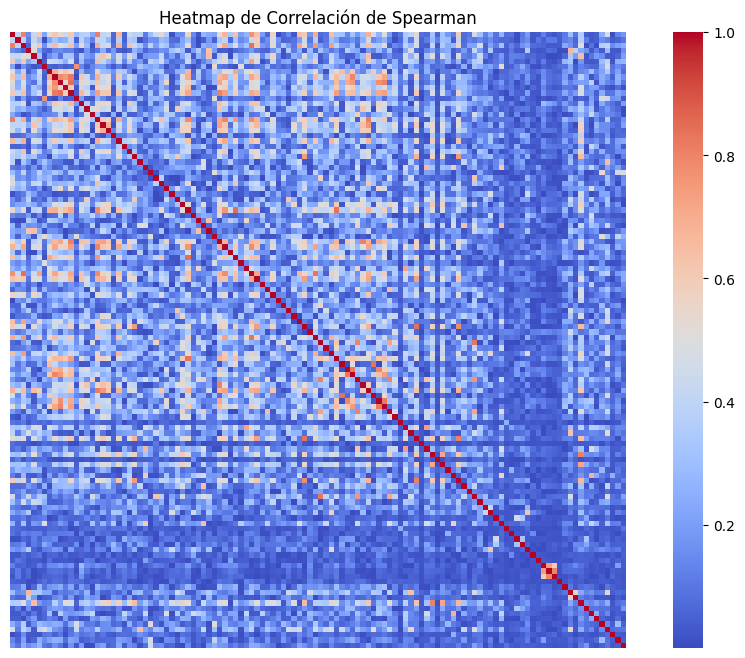

In [29]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el heatmap
sns.heatmap(correlation_spearman_abs, cmap='coolwarm', fmt='.2f', square=True, xticklabels=False, yticklabels=False)

# Configurar los títulos y etiquetas
plt.title('Heatmap de Correlación de Spearman')
plt.show()


In [30]:
df_corr.to_csv("Alta_correlacion/STAT3_corr.csv", index=False)

# Determinación de normalidad
<hr>

In [31]:
dic_norm = {}

In [32]:
from scipy.stats import anderson

for i in df_corr.columns:
    result = anderson(df_corr[i], dist="norm")
    if result.statistic > result.critical_values[2]:
        resultado = 0 # No es normal
    else:
        resultado = 1 # Es normal
    dic_norm[i] = resultado

# Pruebas de hipótesis
<hr>

In [33]:
df_h = pd.concat((df_corr, df["Inhibidor"]), axis=1)

In [34]:
df_h

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,MinPartialCharge,MaxAbsPartialCharge,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,...,fr_phos_acid,fr_piperdine,fr_piperzine,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_thiazole,fr_thiophene,Inhibidor
0,0.856206,0.042907,0.223770,0.492063,0.502793,0.697946,0.155659,0.676472,0.534164,0.584302,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.857670,0.022011,0.226489,0.764487,0.383167,0.665196,0.146535,0.676742,0.551372,0.565081,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.843553,0.022417,0.218556,0.764486,0.383167,0.593974,0.146535,0.667209,0.473137,0.561910,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.789891,0.031830,0.629177,0.678273,0.314637,0.278788,0.018008,0.430801,0.647191,0.332016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.855394,0.015902,0.226730,0.764487,0.383167,0.579832,0.146535,0.649078,0.666783,0.539466,...,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.800589,0.151138,0.259625,0.661993,0.331086,0.504669,0.041423,0.810416,0.393506,0.512615,...,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,1
826,0.611629,0.199931,0.799236,0.650780,0.342417,0.450980,0.015524,0.682759,0.219454,0.724567,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
827,0.839643,0.066278,0.266911,0.661993,0.331086,0.616647,0.041389,0.824226,0.375867,0.512204,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
828,0.863887,0.029609,0.277630,0.650012,0.343193,0.566616,0.155709,0.740407,0.503667,0.585028,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0,1


In [35]:
grupo_inhibidor = df_corr[df_h["Inhibidor"] == 1]

In [36]:
grupo_inhibidor

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,MinPartialCharge,MaxAbsPartialCharge,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,...,fr_phenol_noOrthoHbond,fr_phos_acid,fr_piperdine,fr_piperzine,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_thiazole,fr_thiophene
1,0.857670,0.022011,0.226489,0.764487,0.383167,0.665196,0.146535,0.676742,0.551372,0.565081,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.839482,0.031957,0.223687,0.708967,0.383167,0.612045,0.146535,0.683496,0.472611,0.564762,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.851348,0.007862,0.222015,0.709708,0.383167,0.594910,0.146535,0.684023,0.480024,0.566485,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.856115,0.003939,0.221633,0.713584,0.383167,0.582516,0.146535,0.683126,0.490779,0.555276,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.765384,0.121242,0.681180,0.696352,0.296369,0.775123,0.016720,0.524598,0.603688,0.541948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,0.839526,0.083138,0.266001,0.661993,0.331086,0.604314,0.041389,0.824226,0.376015,0.512204,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
823,0.835230,0.079743,0.554069,0.635996,0.357356,0.612045,0.016897,0.039885,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
825,0.800589,0.151138,0.259625,0.661993,0.331086,0.504669,0.041423,0.810416,0.393506,0.512615,...,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0
827,0.839643,0.066278,0.266911,0.661993,0.331086,0.616647,0.041389,0.824226,0.375867,0.512204,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
grupo_no_inhibidor = df_corr[df_h["Inhibidor"] == 0]

In [38]:
grupo_no_inhibidor

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,MinPartialCharge,MaxAbsPartialCharge,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,...,fr_phenol_noOrthoHbond,fr_phos_acid,fr_piperdine,fr_piperzine,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_thiazole,fr_thiophene
0,0.856206,0.042907,0.223770,0.492063,0.502793,0.697946,0.155659,0.676472,0.534164,0.584302,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.843553,0.022417,0.218556,0.764486,0.383167,0.593974,0.146535,0.667209,0.473137,0.561910,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.789891,0.031830,0.629177,0.678273,0.314637,0.278788,0.018008,0.430801,0.647191,0.332016,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.855394,0.015902,0.226730,0.764487,0.383167,0.579832,0.146535,0.649078,0.666783,0.539466,...,0.000000,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.726713,0.316551,0.820306,0.866395,0.124548,0.668119,0.012182,0.732151,0.187073,0.797807,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,0.775039,0.086852,0.262813,0.852043,0.242625,0.601307,0.041388,0.789598,0.390383,0.542304,...,0.000000,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0
820,0.814663,0.010287,0.259695,0.721931,0.270522,0.644258,0.041388,0.790221,0.391882,0.522022,...,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
824,0.794193,0.052485,0.726327,0.710140,0.282436,0.558824,0.015603,0.552321,0.536344,0.597221,...,0.000000,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826,0.611629,0.199931,0.799236,0.650780,0.342417,0.450980,0.015524,0.682759,0.219454,0.724567,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
p_values = {}

In [40]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

for i in df_h.columns:
    if i == "Inhibidor":
        break
    if dic_norm == 0:
        estadistica, p_valor = ttest_ind(grupo_inhibidor[i], grupo_no_inhibidor[i])
    else:
        estadistica, p_valor = mannwhitneyu(grupo_inhibidor[i], grupo_no_inhibidor[i])

    if p_valor > 0.05:
        p_values[i] = 0 # Los grupos son iguales y por lo tanto, no es significativa
    else:
        p_values[i] = 1 # Los grupos son diferentes y por lo tanto, es significativa

In [41]:
p_values

{'MaxAbsEStateIndex': 1,
 'MinAbsEStateIndex': 1,
 'MinEStateIndex': 1,
 'MinPartialCharge': 0,
 'MaxAbsPartialCharge': 1,
 'FpDensityMorgan3': 0,
 'BCUT2D_MWHI': 1,
 'BCUT2D_MWLOW': 1,
 'BCUT2D_CHGHI': 1,
 'BCUT2D_CHGLO': 1,
 'BCUT2D_LOGPHI': 1,
 'BCUT2D_LOGPLOW': 1,
 'BCUT2D_MRHI': 1,
 'BCUT2D_MRLOW': 1,
 'AvgIpc': 1,
 'BalabanJ': 1,
 'Chi2v': 1,
 'PEOE_VSA1': 1,
 'PEOE_VSA10': 1,
 'PEOE_VSA11': 0,
 'PEOE_VSA12': 1,
 'PEOE_VSA13': 1,
 'PEOE_VSA14': 1,
 'PEOE_VSA2': 1,
 'PEOE_VSA3': 0,
 'PEOE_VSA4': 1,
 'PEOE_VSA5': 0,
 'PEOE_VSA6': 0,
 'PEOE_VSA7': 1,
 'PEOE_VSA8': 1,
 'PEOE_VSA9': 0,
 'SMR_VSA3': 1,
 'SMR_VSA4': 1,
 'SMR_VSA5': 1,
 'SMR_VSA6': 1,
 'SMR_VSA9': 1,
 'SlogP_VSA10': 1,
 'SlogP_VSA11': 1,
 'SlogP_VSA12': 0,
 'SlogP_VSA2': 1,
 'SlogP_VSA3': 1,
 'SlogP_VSA4': 0,
 'SlogP_VSA5': 0,
 'SlogP_VSA7': 1,
 'SlogP_VSA8': 1,
 'EState_VSA10': 1,
 'EState_VSA2': 1,
 'EState_VSA3': 1,
 'EState_VSA4': 0,
 'EState_VSA5': 1,
 'EState_VSA6': 0,
 'EState_VSA7': 0,
 'EState_VSA8': 1,
 'EState

In [42]:
p_df = pd.Series(p_values)

In [43]:
p_df.value_counts()

1    75
0    41
Name: count, dtype: int64

In [44]:
p_names = p_df[p_df == 1].index

In [45]:
p_names

Index(['MaxAbsEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex',
       'MaxAbsPartialCharge', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI',
       'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI',
       'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'Chi2v', 'PEOE_VSA1',
       'PEOE_VSA10', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2',
       'PEOE_VSA4', 'PEOE_VSA7', 'PEOE_VSA8', 'SMR_VSA3', 'SMR_VSA4',
       'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA9', 'SlogP_VSA10', 'SlogP_VSA11',
       'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA7', 'SlogP_VSA8', 'EState_VSA10',
       'EState_VSA2', 'EState_VSA3', 'EState_VSA5', 'EState_VSA8',
       'EState_VSA9', 'VSA_EState1', 'VSA_EState2', 'VSA_EState3',
       'VSA_EState8', 'FractionCSP3', 'NumAliphaticCarbocycles',
       'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumHAcceptors',
       'NumRotatableBonds', 'NumSaturatedHeterocycles', 'NumSaturatedRings',
       'fr_ArN', 'fr_Ar_N', 'fr_COO2', 'fr_C_O_noCOO', 'fr_NH0', 'fr_

In [46]:
df_p_final = df_h[p_names]

In [47]:
df_p_final

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,MaxAbsPartialCharge,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,...,fr_ether,fr_furan,fr_halogen,fr_imide,fr_para_hydroxylation,fr_phenol,fr_phos_acid,fr_piperzine,fr_pyridine,fr_sulfonamd
0,0.856206,0.042907,0.223770,0.502793,0.155659,0.676472,0.534164,0.584302,0.469273,0.368194,...,0.000000,0.0,0.0,0.0,0.333333,0.000000,1.0,0.0,0.0,0.0
1,0.857670,0.022011,0.226489,0.383167,0.146535,0.676742,0.551372,0.565081,0.479687,0.386771,...,0.000000,0.0,0.0,0.0,0.333333,0.000000,1.0,0.0,0.0,0.0
2,0.843553,0.022417,0.218556,0.383167,0.146535,0.667209,0.473137,0.561910,0.436843,0.366327,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0
3,0.789891,0.031830,0.629177,0.314637,0.018008,0.430801,0.647191,0.332016,0.560924,0.314761,...,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.855394,0.015902,0.226730,0.383167,0.146535,0.649078,0.666783,0.539466,0.616074,0.374958,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.800589,0.151138,0.259625,0.331086,0.041423,0.810416,0.393506,0.512615,0.330136,0.443165,...,0.083333,0.0,0.6,0.0,0.000000,0.000000,0.0,1.0,0.5,0.0
826,0.611629,0.199931,0.799236,0.342417,0.015524,0.682759,0.219454,0.724567,0.324238,0.697260,...,0.416667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
827,0.839643,0.066278,0.266911,0.331086,0.041389,0.824226,0.375867,0.512204,0.315654,0.440556,...,0.166667,0.0,0.3,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0
828,0.863887,0.029609,0.277630,0.343193,0.155709,0.740407,0.503667,0.585028,0.426542,0.394075,...,0.416667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.5


In [48]:
df_p_final.to_csv("Prueba_hipotesis/STAT3_h.csv", index=False)